In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%cd '/home/naodell/work/wbr/analysis'
np.set_printoptions(precision=3)
matplotlib.style.use('default')
params = {'legend.fontsize': 20,
          'axes.labelsize': 20,
          'figure.figsize': (8, 8),
          'axes.facecolor': 'white',
          'axes.titlesize':'x-large',
          'xtick.labelsize':18,
          'ytick.labelsize':18,
         }
matplotlib.rcParams.update(params)
%matplotlib inline
%connect_info

/home/naodell/work/wbr/analysis
{
  "shell_port": 38541,
  "iopub_port": 36707,
  "stdin_port": 56125,
  "control_port": 53441,
  "hb_port": 60239,
  "ip": "127.0.0.1",
  "key": "7659935f-c900191f47f17d0dc80e1f88",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-729b7534-45b6-4795-8872-9fe2dc2b135c.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [22]:
# get the data
param_data = pd.read_csv('data/model_parameters_asimov.csv').set_index('name').iloc[4:]

In [ ]:
# pulls for normalization and miscellaneous params
fig, axes = plt.subplots(2, 1, figsize=(20, 12), facecolor='white', gridspec_kw={'height_ratios':[2,1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# get masked data
norm_data = param_data.query('group == "norm" || group == "misc"')
params_pre  = norm_data['val_init']
stderr_pre  = norm_data['err_init']
params_post = norm_data['val_fit']
stderr_post = norm_data['err_fit']
constraints = norm_data['ratio']

pulls = (params_post - params_pre)/stderr_pre
p_labels = norm_data.label

# plot pulls
nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)
rerr = stderr_post/stderr_pre
ax = axes[0]
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='C0', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )
#ax.fill_between([10.86-2*0.09, 10.86+2*0.09], [0, 0], [4, 4], color = 'b', alpha = 0.25 )

ax.set_ylim(-3.5, 3.5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$')
ax.set_title('pulls (Asimov dataset)')
ax.grid(linestyle='--', axis='y')

ax = axes[1]
ax.bar(xticks, constraints)
ax.plot([0, nparams+1], [1, 1], c='C3', linestyle='--')
ax.set_ylabel(r'$\frac{\sigma_{post}}{\sigma_{pre}}$')
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--', axis='y')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_norm.pdf')
plt.show()

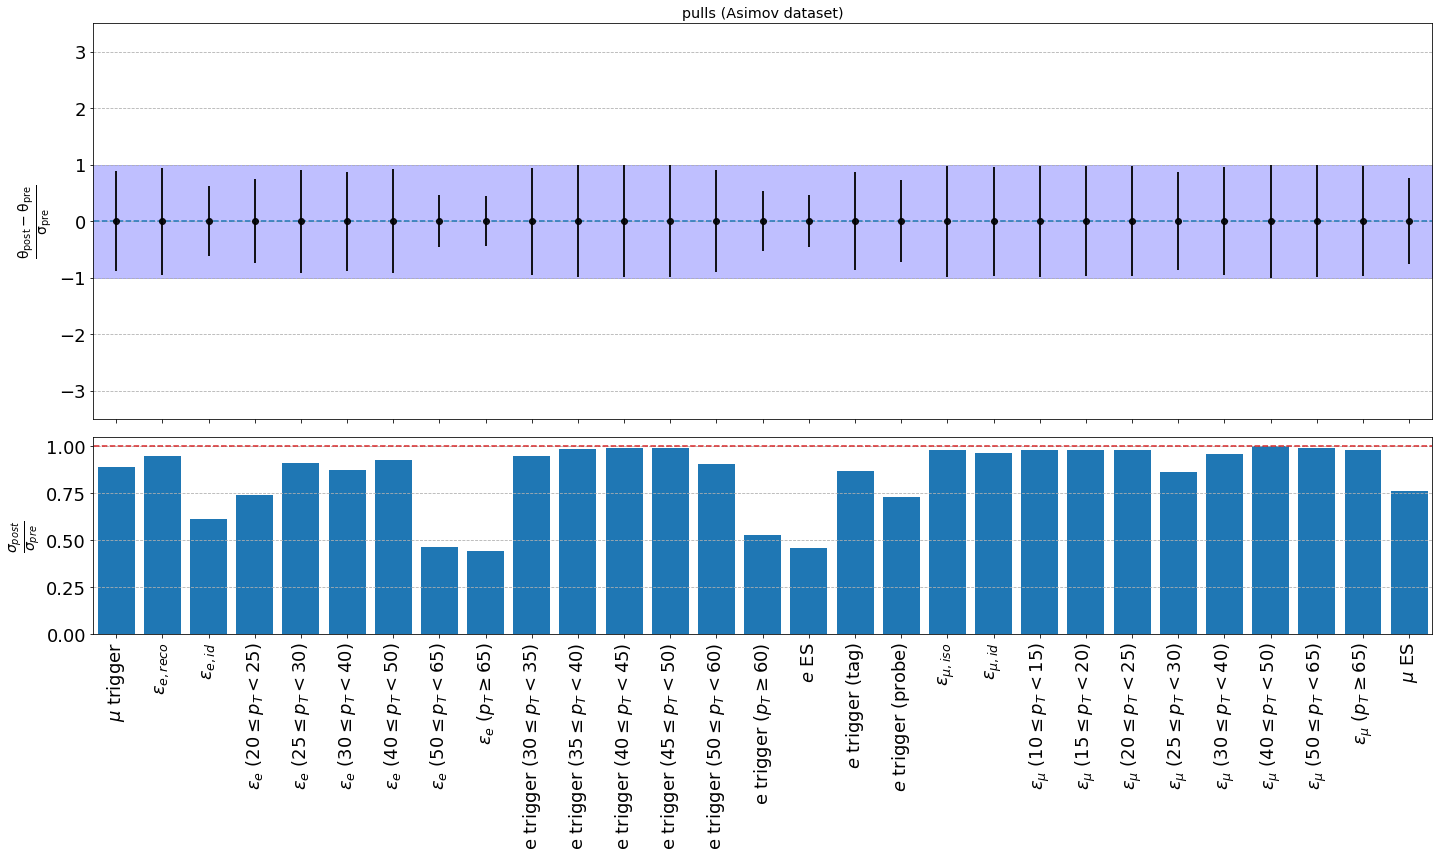

In [39]:
# pulls for e/mu params
fig, axes = plt.subplots(2, 1, figsize=(20, 12), facecolor='white', gridspec_kw={'height_ratios':[2,1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# get masked data
norm_data = param_data.query('group == "reco_lepton"')
params_pre  = norm_data['val_init']
stderr_pre  = norm_data['err_init']
params_post = norm_data['val_fit']
stderr_post = norm_data['err_fit']
constraints = norm_data['ratio']

pulls = (params_post - params_pre)/stderr_pre
p_labels = norm_data.label

# plot pulls
nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)
rerr = stderr_post/stderr_pre
ax = axes[0]
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='C0', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )
#ax.fill_between([10.86-2*0.09, 10.86+2*0.09], [0, 0], [4, 4], color = 'b', alpha = 0.25 )

ax.set_ylim(-3.5, 3.5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$')
ax.set_title('pulls (Asimov dataset)')
ax.grid(linestyle='--', axis='y')

ax = axes[1]
ax.bar(xticks, constraints)
ax.plot([0, nparams+1], [1, 1], c='C3', linestyle='--')
ax.set_ylabel(r'$\frac{\sigma_{post}}{\sigma_{pre}}$')
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--', axis='y')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_lepton.pdf')
plt.show()

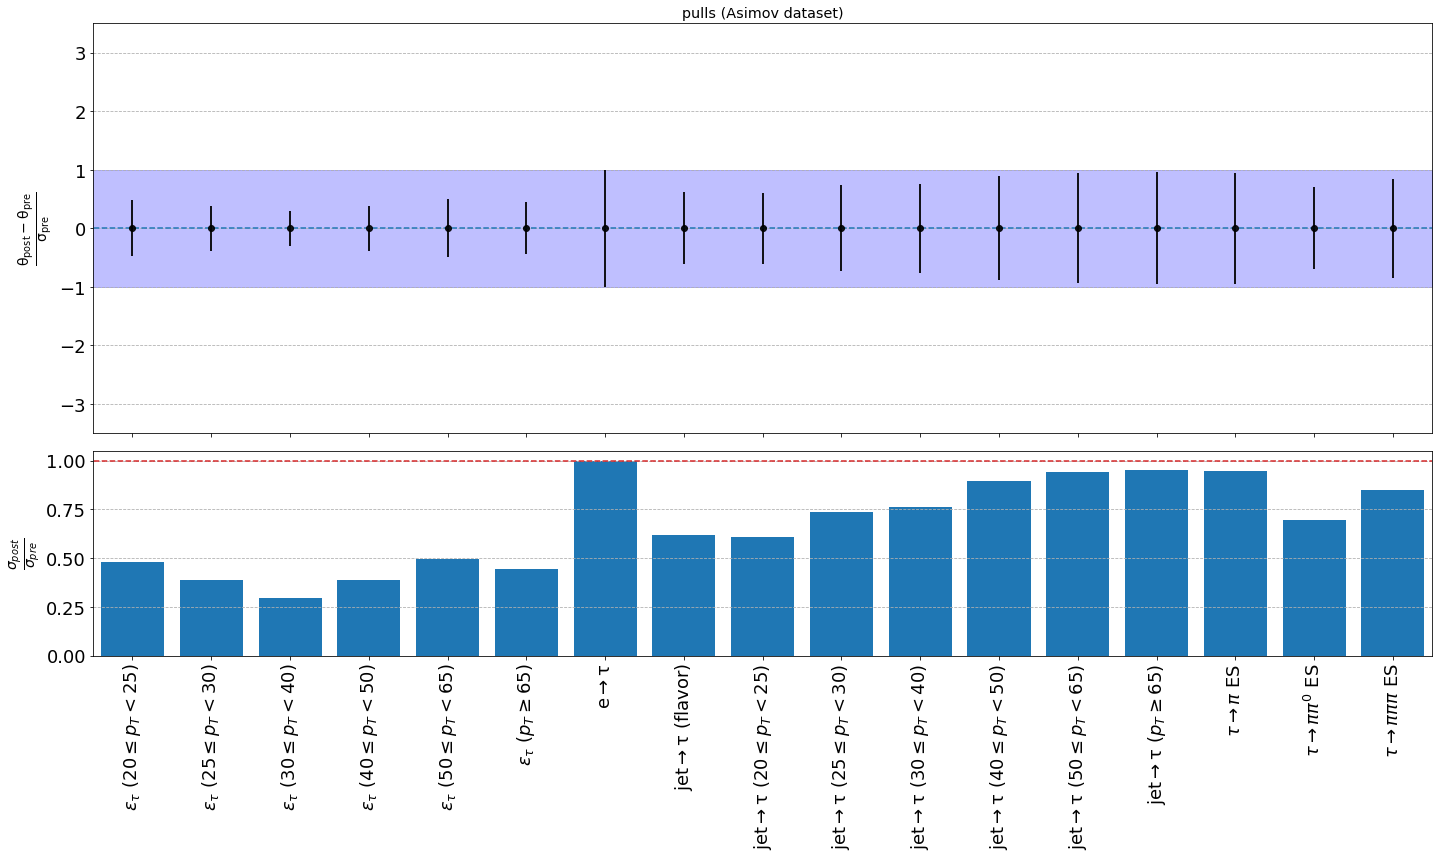

In [40]:
# pulls for tau params
fig, axes = plt.subplots(2, 1, figsize=(20, 12), facecolor='white', gridspec_kw={'height_ratios':[2,1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# get masked data
norm_data = param_data.query('group == "reco_tau"')
params_pre  = norm_data['val_init']
stderr_pre  = norm_data['err_init']
params_post = norm_data['val_fit']
stderr_post = norm_data['err_fit']
constraints = norm_data['ratio']

pulls = (params_post - params_pre)/stderr_pre
p_labels = norm_data.label

# plot pulls
nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)
rerr = stderr_post/stderr_pre
ax = axes[0]
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='C0', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )
#ax.fill_between([10.86-2*0.09, 10.86+2*0.09], [0, 0], [4, 4], color = 'b', alpha = 0.25 )

ax.set_ylim(-3.5, 3.5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$')
ax.set_title('pulls (Asimov dataset)')
ax.grid(linestyle='--', axis='y')

ax = axes[1]
ax.bar(xticks, constraints)
ax.plot([0, nparams+1], [1, 1], c='C3', linestyle='--')
ax.set_ylabel(r'$\frac{\sigma_{post}}{\sigma_{pre}}$')
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--', axis='y')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_tau.pdf')
plt.show()

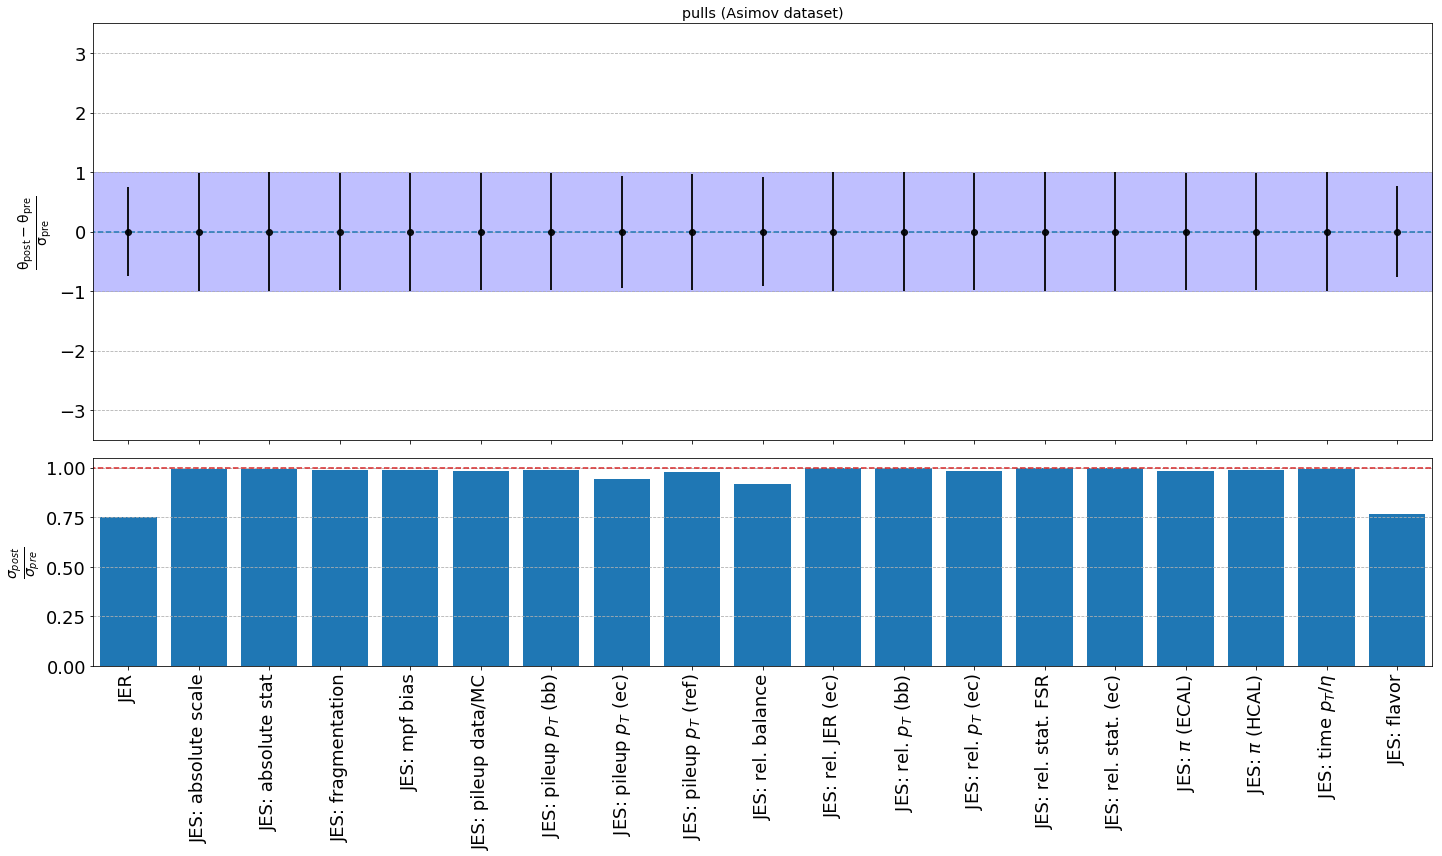

In [41]:
# pulls for JES params
fig, axes = plt.subplots(2, 1, figsize=(20, 12), facecolor='white', gridspec_kw={'height_ratios':[2,1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# get masked data
norm_data = param_data.query('group == "jes"')
params_pre  = norm_data['val_init']
stderr_pre  = norm_data['err_init']
params_post = norm_data['val_fit']
stderr_post = norm_data['err_fit']
constraints = norm_data['ratio']

pulls = (params_post - params_pre)/stderr_pre
p_labels = norm_data.label

# plot pulls
nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)
rerr = stderr_post/stderr_pre
ax = axes[0]
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='C0', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )
#ax.fill_between([10.86-2*0.09, 10.86+2*0.09], [0, 0], [4, 4], color = 'b', alpha = 0.25 )

ax.set_ylim(-3.5, 3.5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$')
ax.set_title('pulls (Asimov dataset)')
ax.grid(linestyle='--', axis='y')

ax = axes[1]
ax.bar(xticks, constraints)
ax.plot([0, nparams+1], [1, 1], c='C3', linestyle='--')
ax.set_ylabel(r'$\frac{\sigma_{post}}{\sigma_{pre}}$')
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--', axis='y')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_jes.pdf')
plt.show()

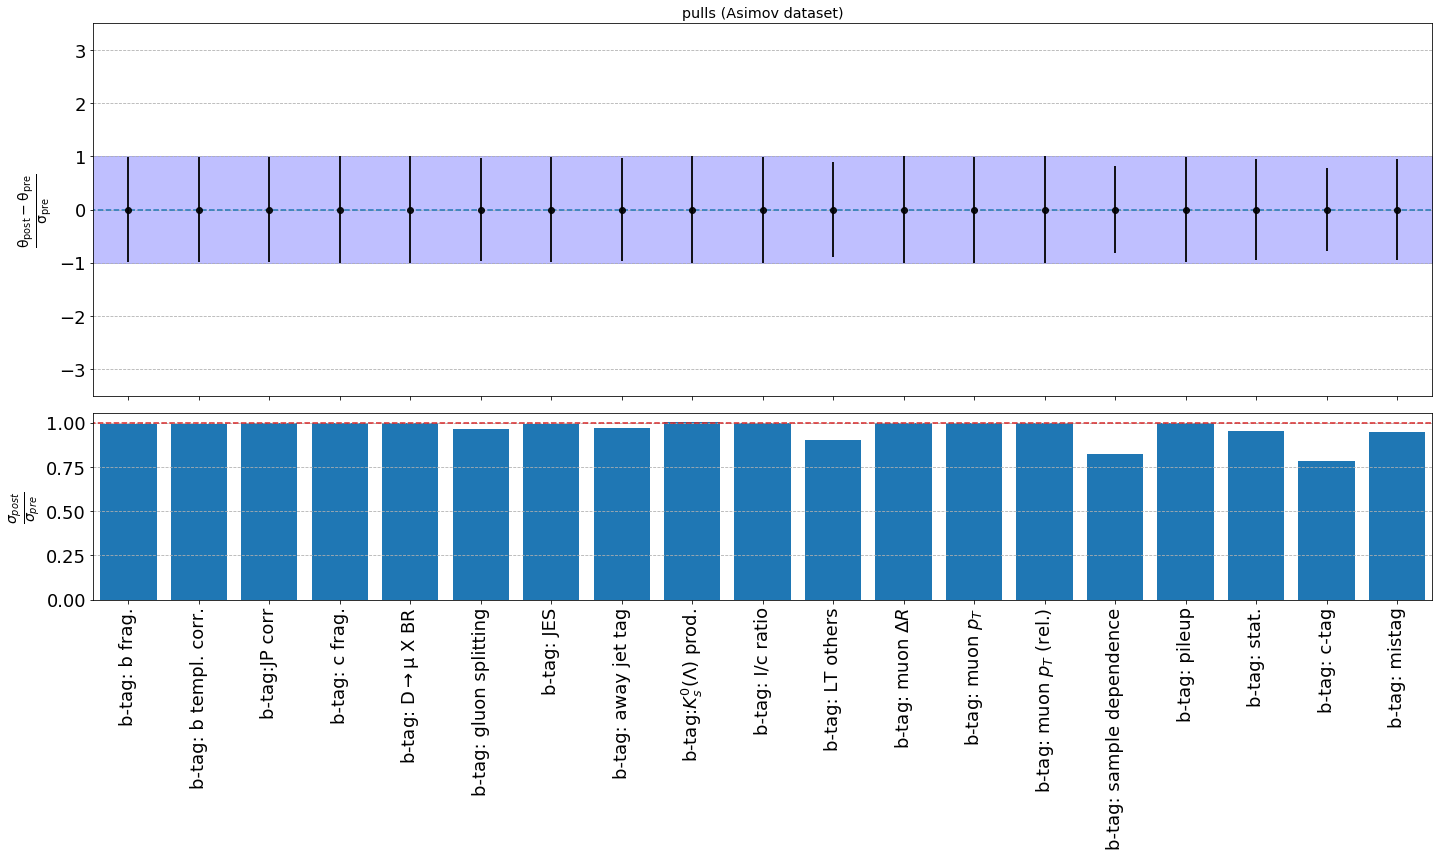

In [42]:
# pulls for b tag params
fig, axes = plt.subplots(2, 1, figsize=(20, 12), facecolor='white', gridspec_kw={'height_ratios':[2,1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# get masked data
norm_data = param_data.query('group == "btag"')
params_pre  = norm_data['val_init']
stderr_pre  = norm_data['err_init']
params_post = norm_data['val_fit']
stderr_post = norm_data['err_fit']
constraints = norm_data['ratio']

pulls = (params_post - params_pre)/stderr_pre
p_labels = norm_data.label

# plot pulls
nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)
rerr = stderr_post/stderr_pre
ax = axes[0]
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='C0', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )
#ax.fill_between([10.86-2*0.09, 10.86+2*0.09], [0, 0], [4, 4], color = 'b', alpha = 0.25 )

ax.set_ylim(-3.5, 3.5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$')
ax.set_title('pulls (Asimov dataset)')
ax.grid(linestyle='--', axis='y')

ax = axes[1]
ax.bar(xticks, constraints)
ax.plot([0, nparams+1], [1, 1], c='C3', linestyle='--')
ax.set_ylabel(r'$\frac{\sigma_{post}}{\sigma_{pre}}$')
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--', axis='y')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_btag.pdf')
plt.show()

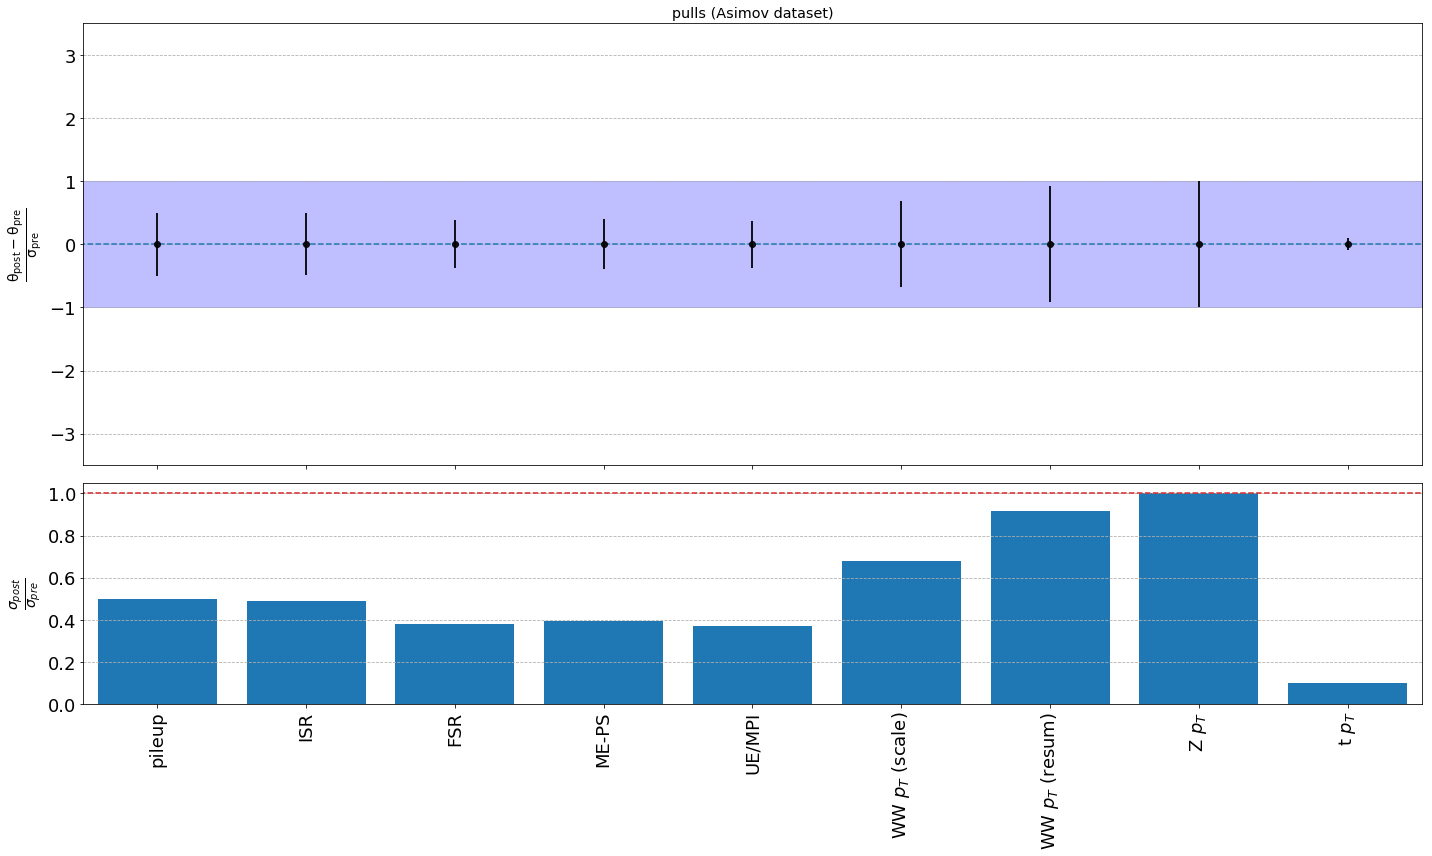

In [43]:
# pulls for other params
fig, axes = plt.subplots(2, 1, figsize=(20, 12), facecolor='white', gridspec_kw={'height_ratios':[2,1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# get masked data
norm_data = param_data.query('group == "misc"')
params_pre  = norm_data['val_init']
stderr_pre  = norm_data['err_init']
params_post = norm_data['val_fit']
stderr_post = norm_data['err_fit']
constraints = norm_data['ratio']

pulls = (params_post - params_pre)/stderr_pre
p_labels = norm_data.label

# plot pulls
nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)
rerr = stderr_post/stderr_pre
ax = axes[0]
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='C0', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )
#ax.fill_between([10.86-2*0.09, 10.86+2*0.09], [0, 0], [4, 4], color = 'b', alpha = 0.25 )

ax.set_ylim(-3.5, 3.5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$')
ax.set_title('pulls (Asimov dataset)')
ax.grid(linestyle='--', axis='y')

ax = axes[1]
ax.bar(xticks, constraints)
ax.plot([0, nparams+1], [1, 1], c='C3', linestyle='--')
ax.set_ylabel(r'$\frac{\sigma_{post}}{\sigma_{pre}}$')
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--', axis='y')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_misc.pdf')
plt.show()